In [1]:
import squarify
import folderstats
import matplotlib.pyplot as plt


In [2]:
import microlog

microlog.start(
    application="Treemap",
    version=1.1,
    info="This uses Pandas",
)

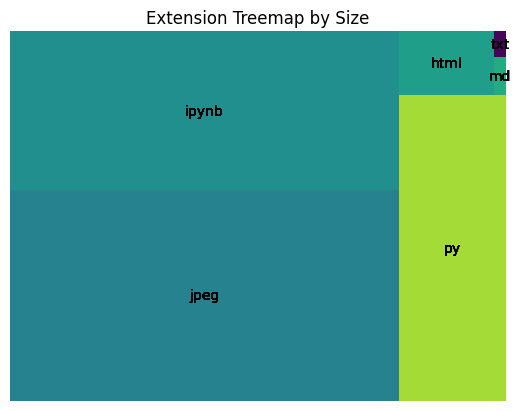

In [3]:

for n in range(10):
    df = folderstats.folderstats('./', ignore_hidden=True)


    # Group by extension and sum all sizes for each extension
    extension_sizes = df.groupby('extension')['size'].sum()
    # Sort elements by size
    extension_sizes = extension_sizes.sort_values(ascending=False)

    squarify.plot(sizes=extension_sizes.values, label=extension_sizes.index.values)
    plt.title('Extension Treemap by Size')
    plt.axis('off')

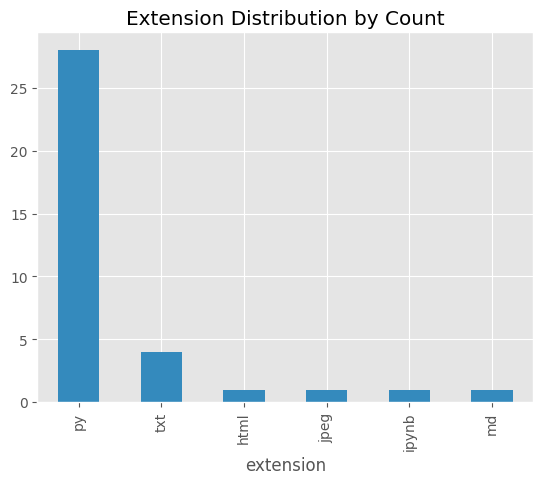

In [4]:
for n in range(10):
    with plt.style.context('ggplot'):
        df['extension'].value_counts().plot(
            kind='bar', color='C1', title='Extension Distribution by Count');

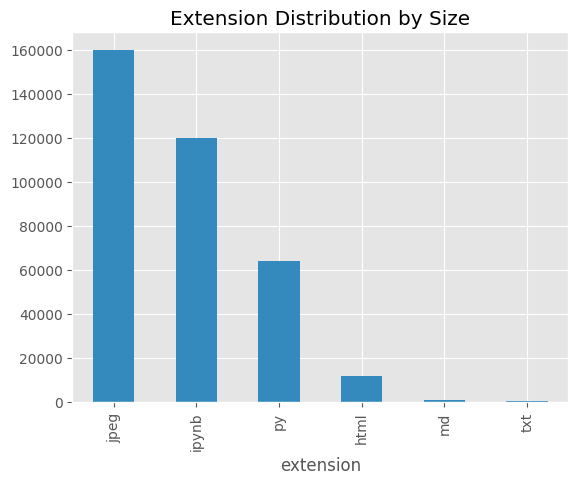

In [5]:
for n in range(10):
    with plt.style.context('ggplot'):
        # Group by extension and sum all sizes for each extension 
        extension_sizes = df.groupby('extension')['size'].sum()
        # Sort elements by size
        extension_sizes = extension_sizes.sort_values(ascending=False)
        
        extension_sizes.plot(
            kind='bar', color='C1', title='Extension Distribution by Size');

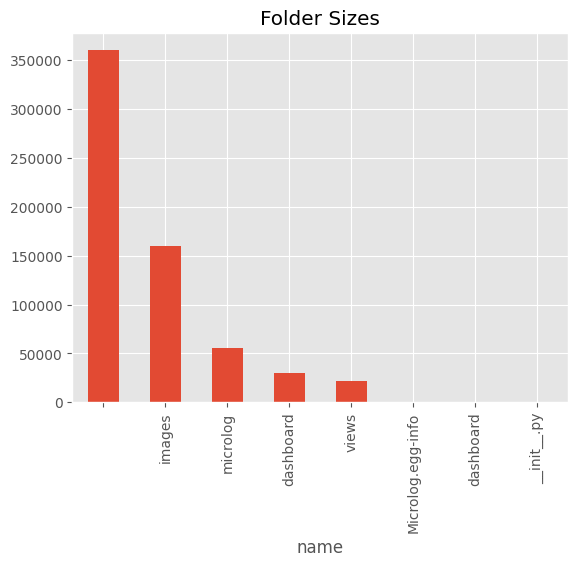

In [6]:
for n in range(10):
    with plt.style.context('ggplot'):
        # Filter the data set to only folders
        df_folders = df[df['folder']]
        # Set the name to be the index (so we can use it as a label later)
        df_folders.set_index('name', inplace=True)
        # Sort the folders by size
        df_folders = df_folders.sort_values(by='size', ascending=False)
        
        # Show the size of the largest 50 folders as a bar plot
        df_folders['size'][:50].plot(kind='bar', color='C0', title='Folder Sizes');

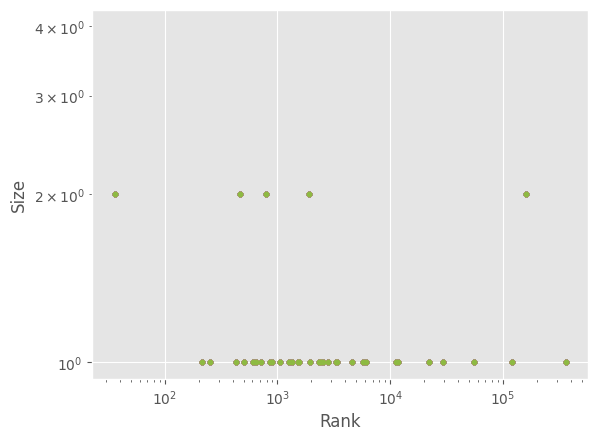

In [7]:
import numpy as np

for n in range(1000):
    with plt.style.context('ggplot'):
        y, bins = np.histogram(df['size'], bins=10000)
        plt.loglog(bins[:-1], y, '.');
        plt.ylabel('Size')
        plt.xlabel('Rank')

In [8]:
import networkx as nx

for n in range(10):
    # Sort the index
    df_sorted = df.sort_values(by='id')

    G = nx.Graph()
    for i, row in df_sorted.iterrows():
        if row.parent:
            G.add_edge(row.id, row.parent)
        
    # Print some additional information
    print(G)

Graph with 46 nodes and 45 edges
Graph with 46 nodes and 45 edges
Graph with 46 nodes and 45 edges
Graph with 46 nodes and 45 edges
Graph with 46 nodes and 45 edges
Graph with 46 nodes and 45 edges
Graph with 46 nodes and 45 edges
Graph with 46 nodes and 45 edges
Graph with 46 nodes and 45 edges
Graph with 46 nodes and 45 edges


In [9]:
microlog.stop()

MICROLOG: view log in http://127.0.0.1:4000/log/Treemap-1.1-08-Apr-2023-22:21:02.log.zip


In [11]:
from IPython.display import IFrame
IFrame(src='http://127.0.0.1:4000/log/Treemap-1.1-08-Apr-2023-22:21:02.log.zip', width=700, height=600)

Exception in thread Thread-1:
Traceback (most recent call last):
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/urllib/request.py", line 1319, in do_open
    h.request(req.get_method(), req.selector, req.data, headers,
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/http/client.py", line 1245, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/http/client.py", line 1291, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/http/client.py", line 1240, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framewor